In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('production-vegetale-2010-2022.xlsx')

In [3]:
df.head()

,Occurrence,Filière,Produit,Indicateur,Valeur
0,2010/2011,Agrumes,Autres agrumes,Production-T (Tonnes),2537.85
1,2010/2011,Agrumes,Autres agrumes,Superficie (Ha),488.96
2,2010/2011,Agrumes,Citron,Production-T (Tonnes),93176.72
3,2010/2011,Agrumes,Citron,Superficie (Ha),2834.23
4,2010/2011,Agrumes,Orange_Autres,Production-T (Tonnes),25951.90


In [4]:
df.isnull().sum()

Occurrence    0
Filière       0
Produit       0
Indicateur    0
 Valeur       0
dtype: int64

In [5]:
df.duplicated().sum()

1148

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(13542, 5)

In [8]:
df.dtypes

Occurrence     object
Filière        object
Produit        object
Indicateur     object
 Valeur       float64
dtype: object

In [9]:
df.columns = ['Occurrence', 'Filière', 'Produit', 'Indicateur', 'Valeur']

In [10]:
quantity_producted_df = df[df['Indicateur']=='Production-T (Tonnes)']
quantity_producted_df.drop(columns='Indicateur', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10564\2362001183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quantity_producted_df.drop(columns='Indicateur', inplace=True)


In [11]:
quantity_producted_df.head()

,Occurrence,Filière,Produit,Valeur
0,2010/2011,Agrumes,Autres agrumes,2537.85
2,2010/2011,Agrumes,Citron,93176.72
4,2010/2011,Agrumes,Orange_Autres,25951.90
6,2010/2011,Agrumes,Orange_Maroc late,414549.44
8,2010/2011,Agrumes,Orange_Navel,300867.41


In [12]:
quantity_producted_df.to_excel("quantity_producted.xlsx", index=False)

In [13]:
surface_df = df[df['Indicateur']=='Superficie (Ha)']
surface_df.drop(columns='Indicateur', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10564\255179968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surface_df.drop(columns='Indicateur', inplace=True)


In [14]:
surface_df.head()

,Occurrence,Filière,Produit,Valeur
1,2010/2011,Agrumes,Autres agrumes,488.96
3,2010/2011,Agrumes,Citron,2834.23
5,2010/2011,Agrumes,Orange_Autres,3737.54
7,2010/2011,Agrumes,Orange_Maroc late,21522.96
9,2010/2011,Agrumes,Orange_Navel,15791.48


In [15]:
surface_df.to_excel("surface_cultivee.xlsx",index=False )

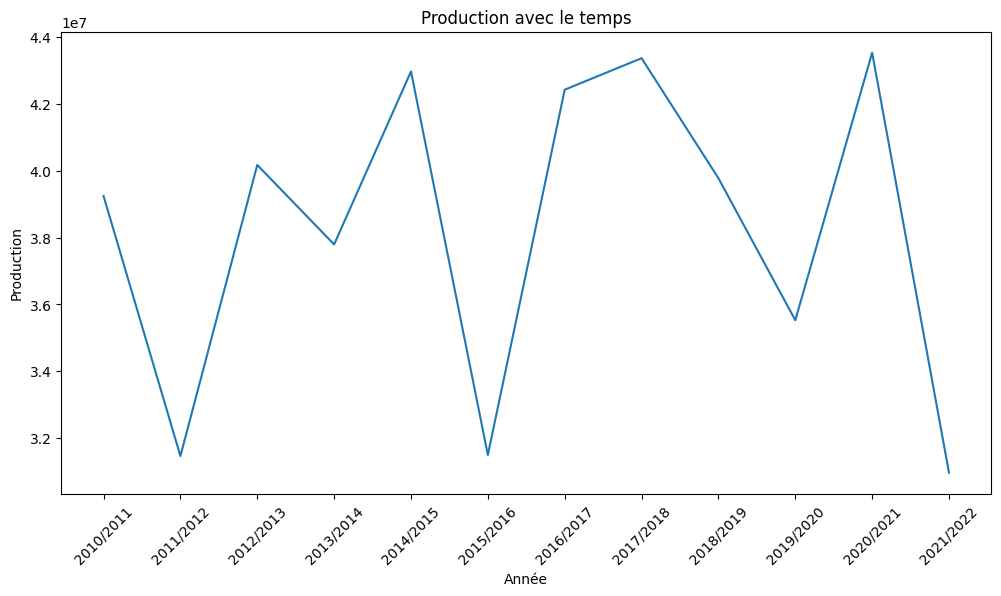

In [16]:
#Production Annuelle
production_annuelle = quantity_producted_df.groupby('Occurrence')['Valeur'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(production_annuelle['Occurrence'], production_annuelle['Valeur'])
plt.title('Production avec le temps')
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Production')
plt.show()

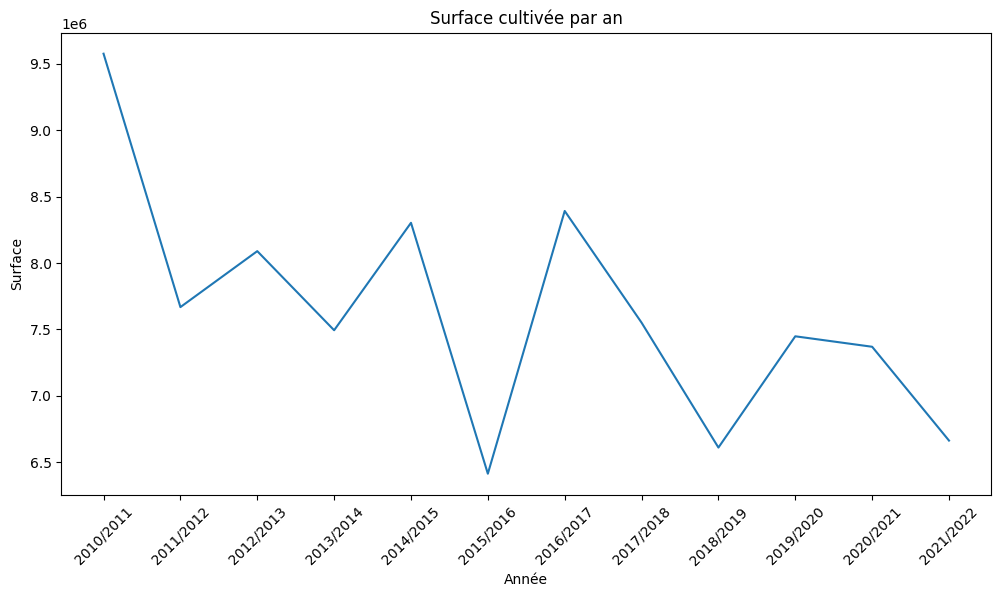

In [17]:
#Surface cultivée par an 
surface_cultivée = surface_df.groupby('Occurrence')['Valeur'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(surface_cultivée['Occurrence'], surface_cultivée['Valeur'])
plt.title('Surface cultivée par an')
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Surface')
plt.show()

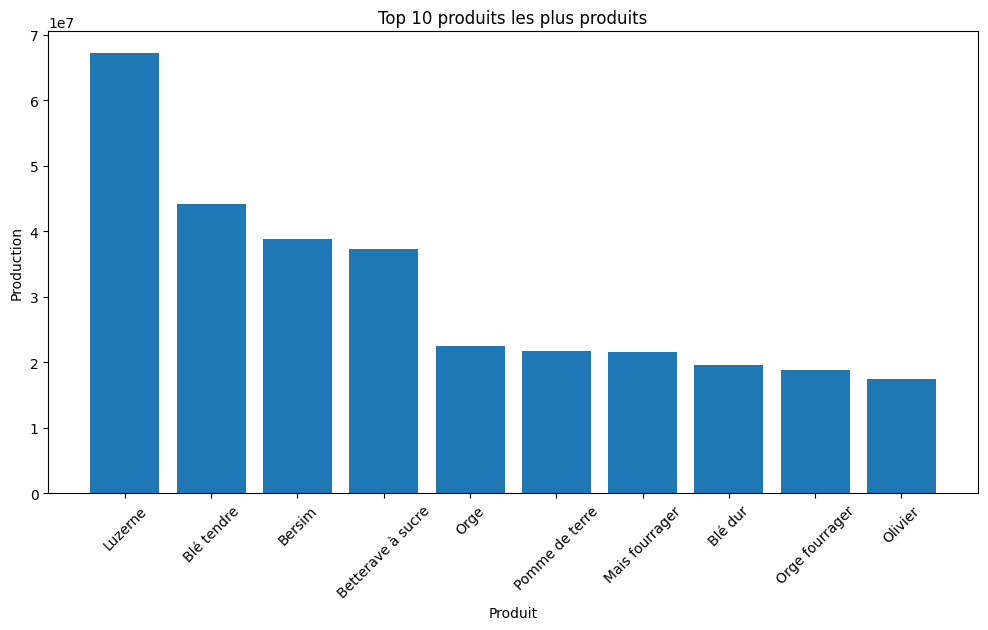

In [18]:
#Top 10 produits les plus produits
product_production = quantity_producted_df.groupby('Produit')['Valeur'].sum().reset_index()
top_10 = product_production.sort_values(by='Valeur', ascending=False).reset_index(drop=True).iloc[0:10]
plt.figure(figsize=(12, 6))
plt.bar(top_10['Produit'], top_10['Valeur'])
plt.xticks(rotation=45)
plt.title('Top 10 produits les plus produits')
plt.xlabel('Produit')
plt.ylabel('Production')
plt.show()

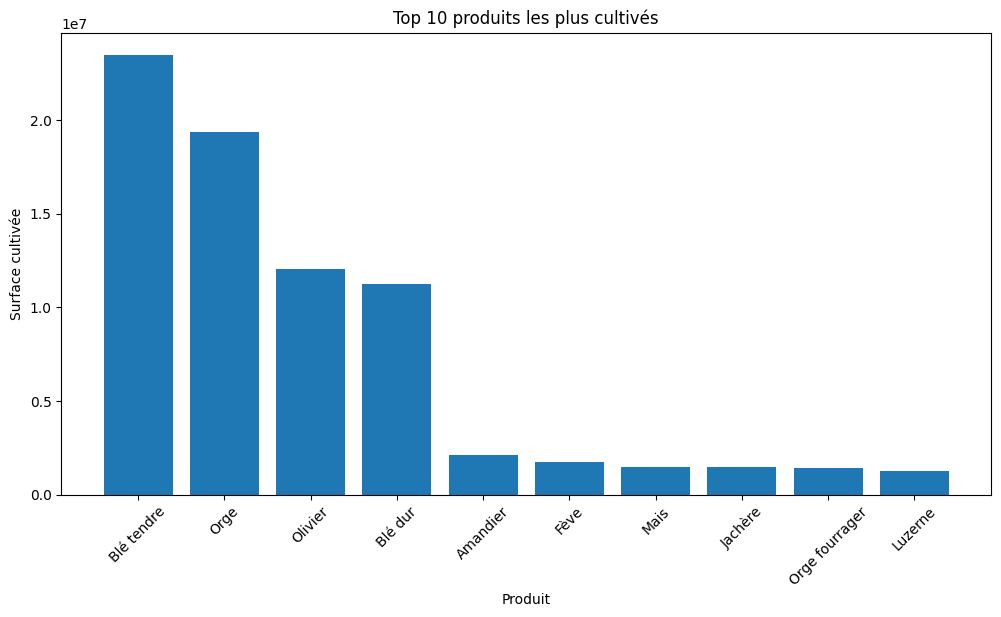

In [19]:
#Top 10 produits les plus cultivés 
product_surface = surface_df.groupby('Produit')['Valeur'].sum().reset_index()
top_10 = product_surface.sort_values(by='Valeur', ascending=False).reset_index(drop=True).iloc[0:10]
plt.figure(figsize=(12, 6))
plt.bar(top_10['Produit'], top_10['Valeur'])
plt.xticks(rotation=45)
plt.title('Top 10 produits les plus cultivés')
plt.xlabel('Produit')
plt.ylabel('Surface cultivée')
plt.show()

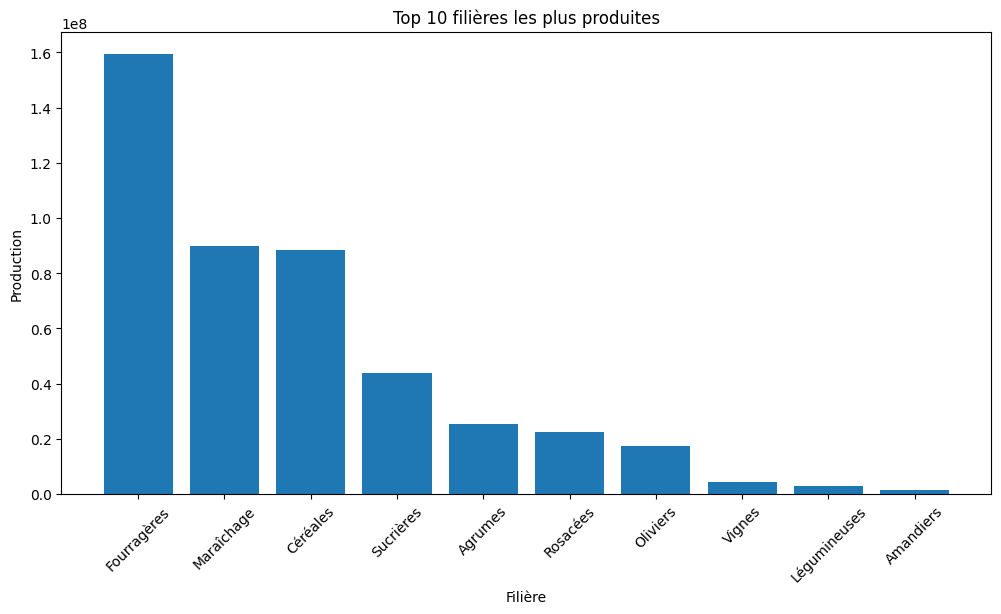

In [20]:
#Top 10 filières les plus produites 
filiere_production = quantity_producted_df.groupby('Filière')['Valeur'].sum().reset_index()
top_10 = filiere_production.sort_values(by='Valeur', ascending=False).reset_index(drop=True).iloc[0:10]
plt.figure(figsize=(12, 6))
plt.bar(top_10['Filière'], top_10['Valeur'])
plt.xticks(rotation=45)
plt.title('Top 10 filières les plus produites')
plt.xlabel('Filière')
plt.ylabel('Production')
plt.show()

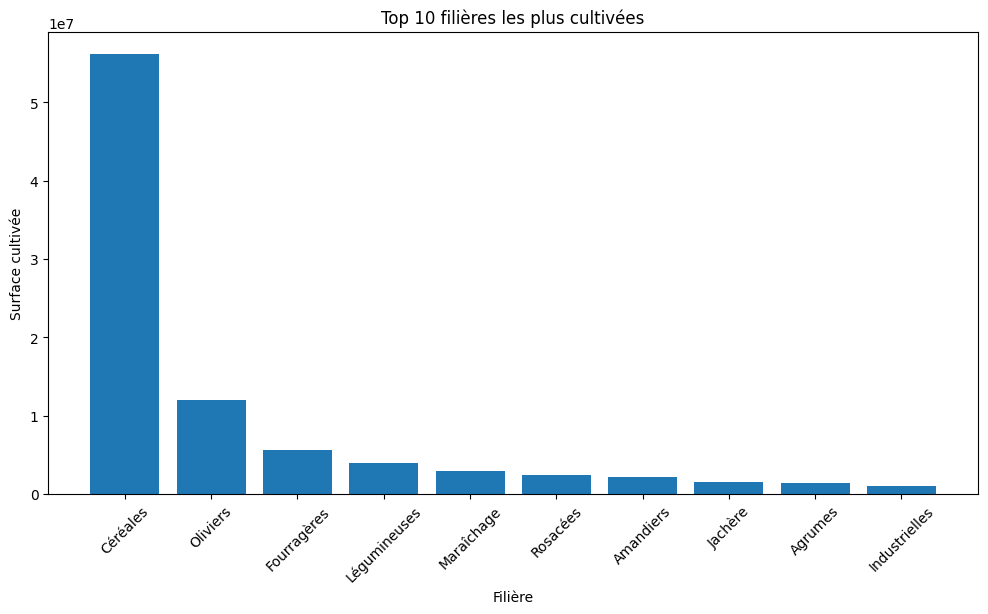

In [21]:
#Top 10 filières les plus cultivées
filiere_surface = surface_df.groupby('Filière')['Valeur'].sum().reset_index()
top_10 = filiere_surface.sort_values(by='Valeur', ascending=False).reset_index(drop=True).iloc[0:10]
plt.figure(figsize=(12, 6))
plt.bar(top_10['Filière'], top_10['Valeur'])
plt.xticks(rotation=45)
plt.title('Top 10 filières les plus cultivées')
plt.xlabel('Filière')
plt.ylabel('Surface cultivée')
plt.show()

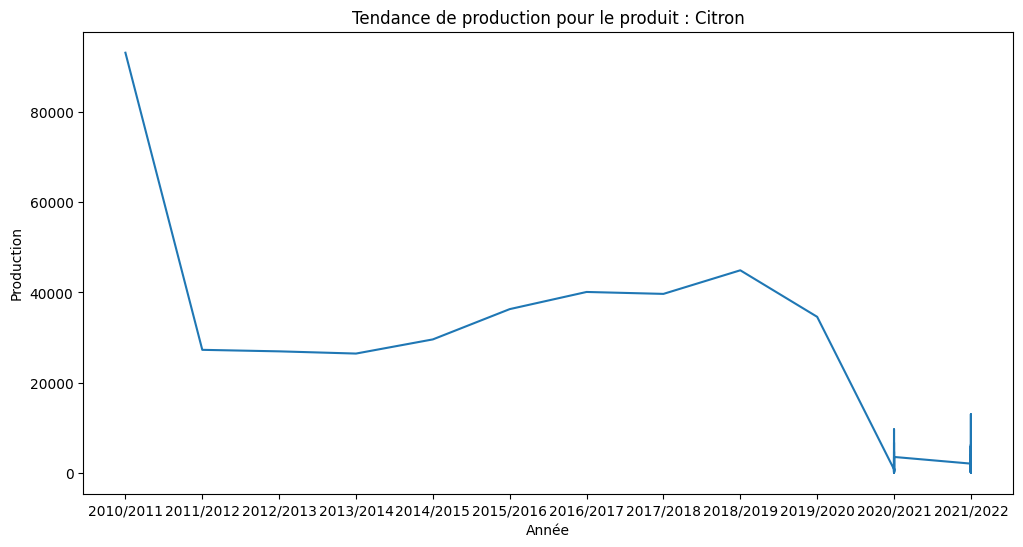

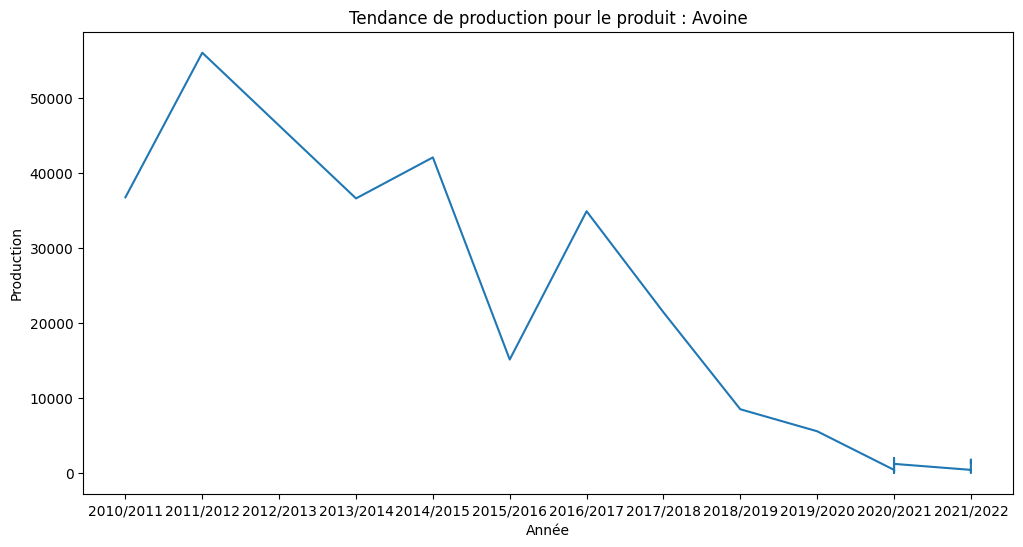

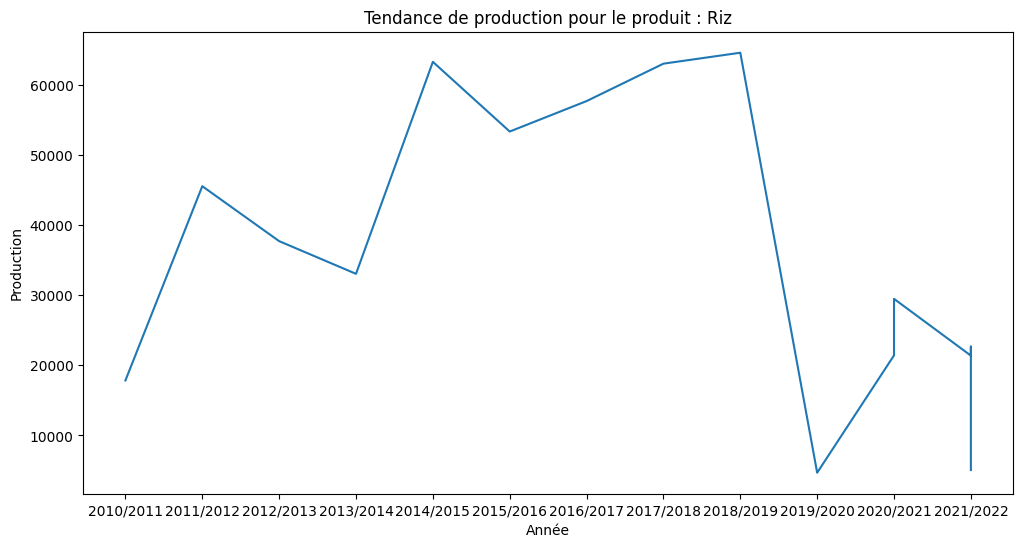

In [22]:
#Production les produits : Citron, Avoine, Riz
products = ['Citron', 'Avoine', 'Riz'] 
for product in products :
    product_data = quantity_producted_df[quantity_producted_df['Produit'] == product]
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['Occurrence'], product_data['Valeur'])
    plt.title(f'Tendance de production pour le produit : {product}')
    plt.xlabel('Année')
    plt.ylabel('Production')
    plt.show()

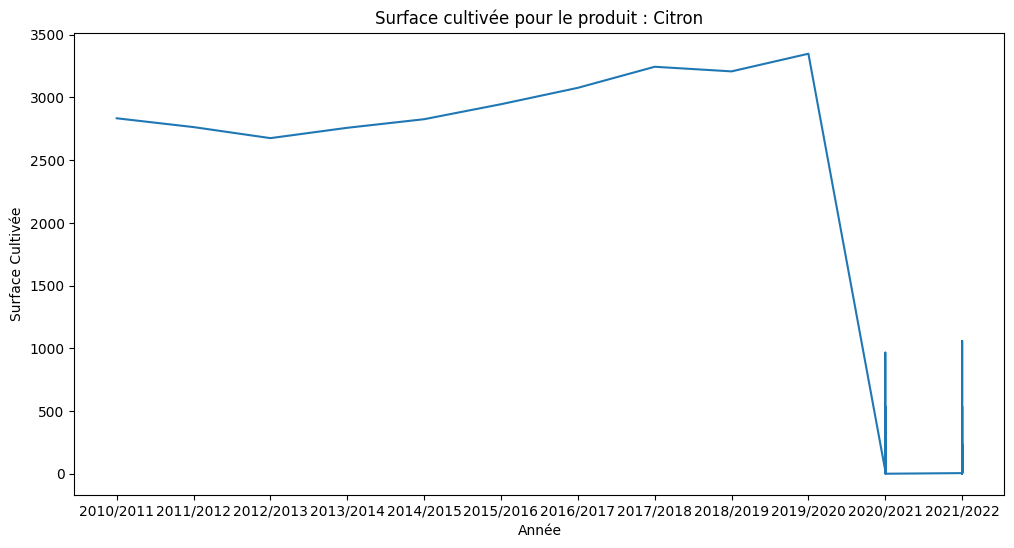

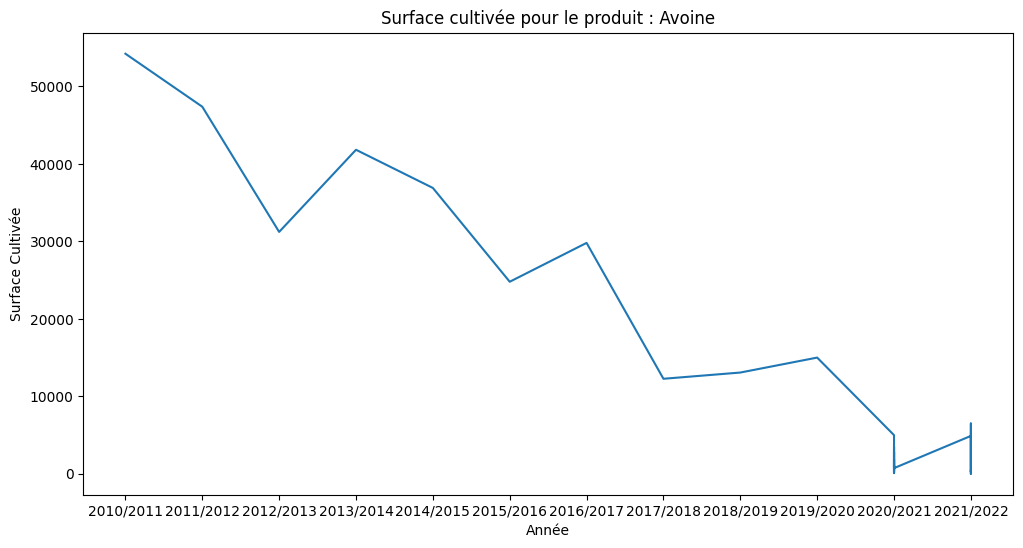

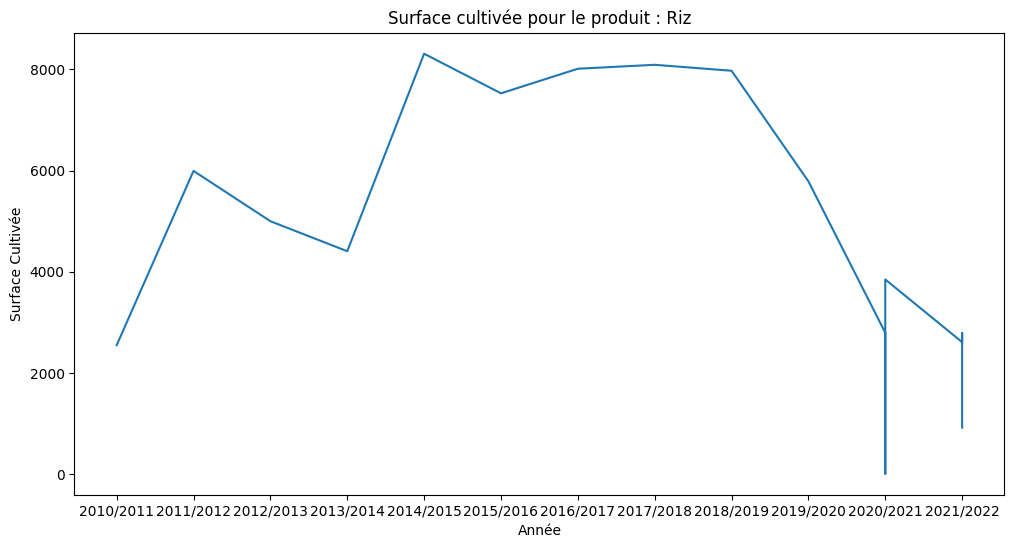

In [23]:
# Surface cultivée pour les produits :  Citron, Avoine, Riz
products = ['Citron', 'Avoine', 'Riz'] 
for product in products:
    product_data = surface_df[surface_df['Produit'] == product]
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['Occurrence'], product_data['Valeur'])
    plt.title(f'Surface cultivée pour le produit : {product}')
    plt.xlabel('Année')
    plt.ylabel('Surface Cultivée')
    plt.show()